In [1]:
%pylab inline

import os

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

Populating the interactive namespace from numpy and matplotlib


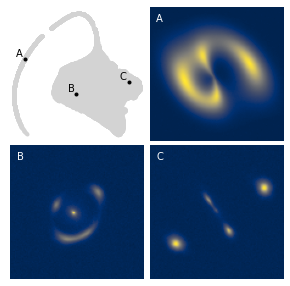

In [2]:
def umap_mock_lens(x0, y0, n_nearest, umap_result, umap_x, umap_y):
    # Distance squared
    d_sq = (umap_x - x0)**2 + (umap_y - y0)**2

    # Get the sorted indices based on the distances
    sorted_indices = np.argsort(d_sq)

    for k in range(n_nearest):
        
        # The kth closest point index
        idx = sorted_indices[k]
        
        # Get the corresponding key of mock lens
        mock_lens_key = umap_result["path"][idx].split('/')[-1]
        tmp = np.where(umap_result["path"] == umap_result["path"][idx])[0]
        idx_pair = np.where(tmp==idx)[0][0]
        img_file = os.path.join('D:/Datasets/2023_strong_lensing_data_set/data_set/', mock_lens_key)
        image_data = fits.getdata(img_file, ext=0)[:, :, idx_pair]
        
    return image_data, idx

        
        
def plot_sample_images():
    output_npy = 'D:/Projects/2023_simsiam_vit_lensing/20230521_powen_umaps/res_092/umap_result.npy'
    umap_result = np.load(output_npy, allow_pickle=True).item()
    umap_x = umap_result["embeddings"][:, 0]
    umap_y = umap_result["embeddings"][:, 1]
    
    annotates = ["A", "B", "C"]
    targets = [(-3, 10), (6, 4), (15, 6)]
    imgs = []
    img_ids = []
    for x, y in targets:
        image, idx = umap_mock_lens(x, y,  1, umap_result, umap_x, umap_y)
        imgs.append(image)
        img_ids.append(idx)
        
    fig, ax = plt.subplots(2, 2, figsize=(5, 5))
    plt.subplots_adjust(wspace=0.005, hspace=0.03)
    
    ax[0, 0].plot(umap_x, umap_y, '.', color = '#D3D3D3', zorder=0, rasterized=True)
    for e, idx in enumerate(img_ids):
        ax[0, 0].plot(umap_x[idx], umap_y[idx], '.', color='k', zorder=0)
        ax[0, 0].annotate(annotates[e], xy=(umap_x[idx]-1.5, umap_y[idx]+0.3), color='k')

    for r in range(2):
        for c in range(2):
            ax[r, c].axis('off')
            ax[r, c].set_aspect('equal', adjustable='box')
            
            i = 2 * (r % 2) + c
            if i == 0:
                continue
            j = i - 1
            ax[r, c].imshow(imgs[j], cmap='cividis')
            ax[r, c].annotate(annotates[j], xy=(5, 12), color='w')
            
    
plot_sample_images()

plt.savefig("figures/umap_sample_images.pdf", bbox_inches='tight')


In [3]:
output_name = 'res_092'
output_dir = os.path.join('D:/Projects/2023_simsiam_vit_lensing/20230521_powen_umaps', output_name)

umap_result = np.load(os.path.join(output_dir, "umap_result.npy"), allow_pickle=True).item()
umap_testsets = np.load(os.path.join(output_dir, "umap_testsets.npy"), allow_pickle=True).item()


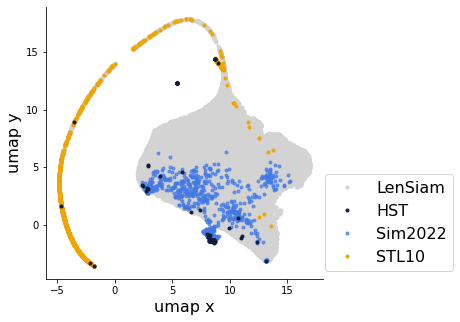

In [4]:
def plot_umap(umap_result, umap_testsets):
    
    fig, ax = plt.subplots(figsize=(7, 5))
    
    ax.plot(umap_result["embeddings"][:, 0], umap_result["embeddings"][:, 1], '.',
            color='#D3D3D3', label="LenSiam", zorder=0, rasterized=True)  #'#e6e6fa'
    ax.plot(umap_testsets["RealHST"][:, 0], umap_testsets["RealHST"][:, 1], '.',
            color='#141c3d', label="HST", zorder=3)
    ax.plot(umap_testsets["Lens2022"][:, 0], umap_testsets["Lens2022"][:, 1], '.',
            color='#4379e6', label="Sim2022", zorder=1, alpha = 0.7)
    ax.plot(umap_testsets["STL10"][:, 0], umap_testsets["STL10"][:, 1], '.',
            color='#f2a400', label="STL10", zorder=2)
    ax.legend(loc=4, bbox_to_anchor=(1.5, 0), fontsize=16)
#     ax.legend(loc=2, frameon=False)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel("umap x", fontsize=16)
    ax.set_ylabel("umap y", fontsize=16)
    ax.spines[['right', 'top']].set_visible(False)


plot_umap(umap_result, umap_testsets)
plt.savefig("figures/umap_main.pdf", bbox_inches='tight')

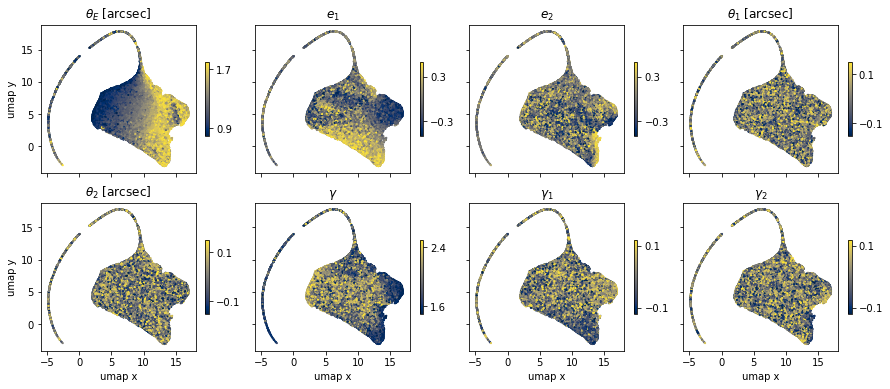

In [5]:
def plot_umap_label(umap_result):
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 6), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    param_list = ["theta_E", "e1", "e2", "center_x", "center_y", "gamma", "gamma1", "gamma2"]
    params_map = {
        'theta_E': r"$\theta_E$ [arcsec]",
        'e1': r"$e_1$",
        'e2': r"$e_2$",
        'center_x': r"$\theta_1$ [arcsec]",
        'center_y': r"$\theta_2$ [arcsec]",
        'gamma': r"$\gamma$",
        'gamma1': r"$\gamma_1$",
        'gamma2': r"$\gamma_2$",
    }
    cb_ticks = {
        'theta_E': [0.9, 1.7],
        'e1': [-0.3, 0.3],
        'e2': [-0.3, 0.3],
        'center_x': [-0.1, 0.1],
        'center_y': [-0.1, 0.1],
        'gamma': [1.6, 2.4],
        'gamma1': [-0.1, 0.1],
        'gamma2': [-0.1, 0.1],        
    }
    
    for r in range(2):
        for c in range(4):
            ikey = 4 * (r % 2) + c
            key = param_list[ikey]
            im = ax[r, c].scatter(umap_result["embeddings"][:, 0], umap_result["embeddings"][:, 1],
                                  c=umap_result[key], marker=".", s=5, rasterized=True, cmap='cividis')
            fig.colorbar(im, ax=ax[r, c], shrink=0.5, ticks=cb_ticks[key])
            ax[r, c].set_title(params_map[key])
            ax[r, c].set_aspect('equal', adjustable='box')
    
    for r in range(2):
        ax[r, 0].set_ylabel("umap y")
    for c in range(4):
        ax[1, c].set_xlabel("umap x")


plot_umap_label(umap_result)

plt.savefig("figures/umap_color_params.pdf", bbox_inches='tight')

In [6]:
# def plot_umap_label(umap_result):
#     fig, ax = plt.subplots(2, 2, figsize=(8, 8))

#     param_list = ["theta_E", "e1", "e2", "gamma"]
#     params_map = {
#         'theta_E': r"$\theta_E$ [arcsec]",
#         'e1': r"$e_1$",
#         'e2': r"$e_2$",
#         'center_x': r"$\theta_1$ [arcsec]",
#         'center_y': r"$\theta_2$ [arcsec]",
#         'gamma': r"$\gamma$",
#         'gamma1': r"$\gamma_1$",
#         'gamma2': r"$\gamma_2$",
#     }
#     for r in range(2):
#         for c in range(2):
#             ikey = 2 * (r % 2) + c
#             key = param_list[ikey]
#             im = ax[r, c].scatter(umap_result["embeddings"][:, 0], umap_result["embeddings"][:, 1],
#                                   c=umap_result[key], marker=".", s=5, rasterized=True, cmap='cividis')
#             fig.colorbar(im, ax=ax[r, c], shrink=0.5, ticks=np.arange(-0.3, 2.5, 0.3))
#             ax[r, c].set_title(params_map[key])
#             ax[r, c].set_aspect('equal', adjustable='box')
#             ax[r, c].set_xlabel("umap x")
#             ax[r, c].set_ylabel("umap y")


# plot_umap_label(umap_result)

# plt.savefig("figures/umap_color_params_2x2.pdf", bbox_inches='tight')